## 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [4]:
# Defining the Display & plotting settings
pd.set_option('display.max_columns', 200) 
sns.set_style('whitegrid')                 
%matplotlib inline

## 2. Loading the Dataset

In [7]:
df = pd.read_csv("Titanic-Dataset.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Exploratory Data Analysis

In [15]:
# Taking the summarized info of the data
df.info()
desc_table = df.describe(include='all').T
display(desc_table)
desc_table.to_csv("data_summary.csv")

# Checking Missing Value
missing = df.isnull().sum()
display(missing)
missing.to_csv("missing_values.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   age         891 non-null    float64
 2   sibsp       891 non-null    int64  
 3   parch       891 non-null    int64  
 4   fare        891 non-null    float64
 5   survived    891 non-null    int64  
 6   sex_male    891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
sex_male,891,2,True,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
embarked_Q,891,2,False,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
embarked_S,891,2,True,646,NaN,NaN,NaN,NaN,NaN,NaN,NaN


pclass        0
age           0
sibsp         0
parch         0
fare          0
survived      0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

## 4. Select Useful Features

In [9]:
features = ['pclass','sex','age','sibsp','parch','fare','embarked','survived']
df = df[features].copy()
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


## 5. Handling Missing Values

In [20]:
# Filling Age and Fare with median
if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].median())
if 'fare' in df.columns:
    df['fare'] = df['fare'].fillna(df['fare'].median())

# Fill Embarked with mode safely
if 'embarked' in df.columns:
    mode_val = df['embarked'].mode()
    if not mode_val.empty:
        df['embarked'] = df['embarked'].fillna(mode_val[0])
    else:
        print("Column 'embarked' has no mode! Check your dataset.")

# Checking for missing values after imputation
missing_after = df.isnull().sum()
display(missing_after)
missing_after.to_csv("missing_after_imputation.csv", index=True)

pclass        0
age           0
sibsp         0
parch         0
fare          0
survived      0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

## 6. Encode Categorical Variables

In [11]:
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)
df.head()

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


## 7. Outlier Detection & Treatment

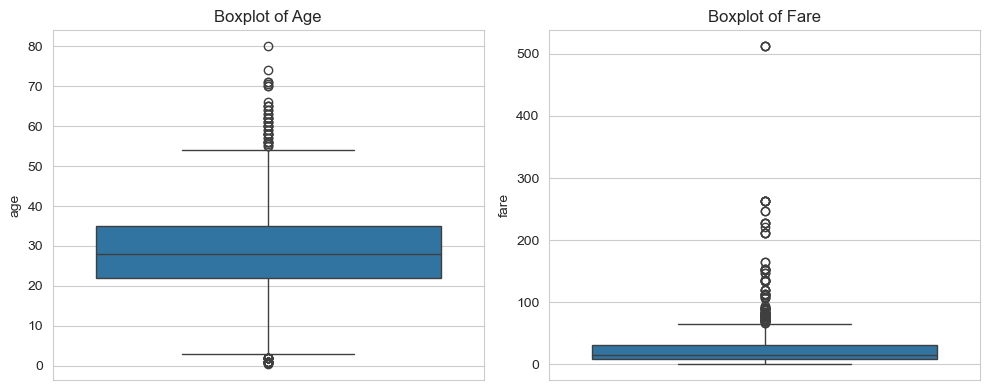

Saved boxplots as boxplots_age_fare.png


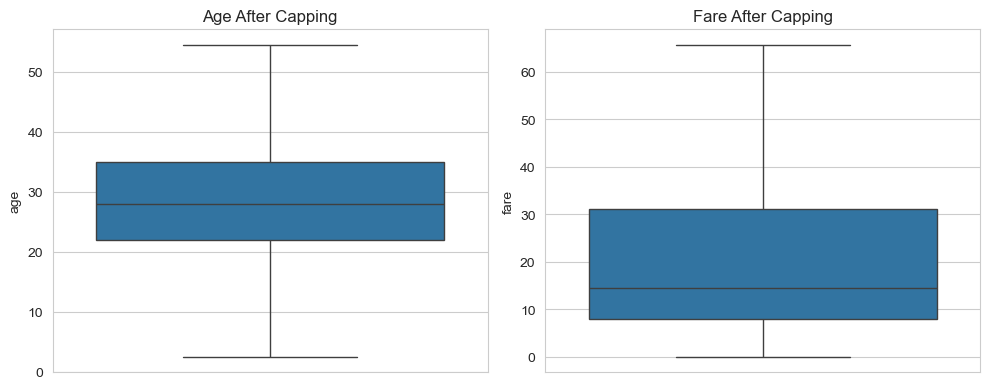

Saved boxplots after capping as boxplots_after_capping.png


In [21]:
# Boxplots
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(y=df['age'], ax=axes[0]).set_title('Boxplot of Age')
sns.boxplot(y=df['fare'], ax=axes[1]).set_title('Boxplot of Fare')
plt.tight_layout()
plt.savefig("boxplots_age_fare.png", dpi=300, bbox_inches='tight')  # Save boxplots
plt.show()
print("Saved boxplots as boxplots_age_fare.png")

# Caping outliers using IQR
def cap_outliers(series):
    Q1, Q3 = series.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series.clip(lower, upper)

df['fare'] = cap_outliers(df['fare'])
df['age'] = cap_outliers(df['age'])

# Boxplots after capping
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(y=df['age'], ax=axes[0]).set_title('Age After Capping')
sns.boxplot(y=df['fare'], ax=axes[1]).set_title('Fare After Capping')
plt.tight_layout()
plt.savefig("boxplots_after_capping.png", dpi=300, bbox_inches='tight')  # Save plots
plt.show()
print("Saved boxplots after capping as boxplots_after_capping.png")

## 8. Feature Scaling

In [22]:
num_cols = ['age','sibsp','parch','fare']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Saving scaled numeric features
df[num_cols].to_csv("scaled_numeric_features.csv", index=False)

display(df.head())

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,3,-0.583432,0.432793,-0.473674,-0.820552,0,True,False,True
1,1,0.742685,0.432793,-0.473674,2.031623,1,False,False,False
2,3,-0.251903,-0.474545,-0.473674,-0.787578,1,False,False,True
3,1,0.494038,0.432793,-0.473674,1.419297,1,False,False,True
4,3,0.494038,-0.474545,-0.473674,-0.781471,0,True,False,True


## 10. Saving Cleaned Dataset

In [23]:
df.to_csv("titanic_clean.csv", index=False)
print("Cleaned dataset saved as titanic_clean.csv")

Cleaned dataset saved as titanic_clean.csv
